In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,9.0,60,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,3,8.0,60,256.0,1347.0,56.400000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,3,3.0,90,81.0,565.0,58.166667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,3,3.0,60,0.0,0.0,0.000000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,3,9.0,240,98.0,612.0,81.600000


In [5]:
df.dtypes

index                           int64
Scotland                        int64
East Anglian Region             int64
London Region                   int64
South Region                    int64
North Western Region            int64
West Midlands Region            int64
South West Region               int64
East Midlands Region            int64
South East Region               int64
Wales                           int64
Yorkshire Region                int64
North Region                    int64
Ireland                         int64
id_student                      int64
code_module                     int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
highest_educ


df['imd_band']=df['imd_band'].map({'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
df['module_domain'] = df['module_domain'].map({'SocialScience': 0,'STEM': 1})
df['term'] = df['term'].map({'J': 0,'B': 1})
df['year'] = df['year'].map({'2013': 0,'2014': 1})
df['is_reenrolled'] = df['is_reenrolled'].replace(range(1,12), 1)
df['gender'] = df['gender'].map({'M': 0,'F': 1})
df['age_band'] = df['age_band'].map({'0-35': 0,'35-55': 1,'55<=':2})
df['region'] = df['region'].map({'Scotland': 0,'East Anglian Region': 1,'London Region':2,'South Region': 3,'North Western Region': 4,'West Midlands Region':5,'South West Region': 6,'East Midlands Region': 7,'South East Region':8,'Wales': 9,'Yorkshire Region': 10,'North Region':11,'Ireland':12})
df['pass_fail_ind'] = df['pass_fail_ind'].map({'FAIL':0,'PASS':1})
df['disability'] = df['disability'].map({'N':0,'Y':1})
df['highest_education'] = df['highest_education'].map({'No Formal quals':0,'Lower Than A Level':1,'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4})

In [6]:
df['term'].count()

28910

In [7]:
df['year'].isnull().sum()

0

In [8]:
df.groupby(['year','term'])['module_domain'].count()

year  term
0     0        7619
      1        4499
1     0       10108
      1        6684
Name: module_domain, dtype: int64

In [9]:
df.groupby(['year','term']).count()

index  Scotland  East Anglian Region  London Region  South Region  \
year term                                                                      
0    0      7619      7619                 7619           7619          7619   
     1      4499      4499                 4499           4499          4499   
1    0     10108     10108                10108          10108         10108   
     1      6684      6684                 6684           6684          6684   

           North Western Region  West Midlands Region  South West Region  \
year term                                                                  
0    0                     7619                  7619               7619   
     1                     4499                  4499               4499   
1    0                    10108                 10108              10108   
     1                     6684                  6684               6684   

           East Midlands Region  South East Region  Wales  Yorkshire Region  \
year term                                                                     
0    0                     7619               7619   7619              7619   
     1                     4499               4499   4499              4499   
1    0                    10108              10108  10108             10108   
     1                     6684               6684   6684              6684   

           North Region  Ireland  id_student  code_module  module_domain  \
year term                                                                  
0    0             7619     7619        7619         7619           7619   
     1             4499     4499        4499         4499           4499   
1    0            10108    10108       10108        10108          10108   
     1             6684     6684        6684         6684           6684   

           module_presentation_length  num_of_prev_attempts  final_result  \
year term                                                                   
0    0                           7619                  7619          7619   
     1                           4499                  4499          4499   
1    0                          10108                 10108         10108   
     1                           6684                  6684          6684   

           date_registration  disability  gender  age_band  highest_education  \
year term                                                                       
0    0                  7619        7619    7619      7619               7619   
     1                  4499        4499    4499      4499               4499   
1    0                 10108       10108   10108     10108              10108   
     1                  6684        6684    6684      6684               6684   

           imd_band  studied_credits  b4_sum_clicks  half_sum_clicks  \
year term                                                              
0    0         7619             7619           7619             7619   
     1         4499             4499           4499             4499   
1    0        10108            10108          10108            10108   
     1         6684             6684           6684             6684   

           std_half_score  
year term                  
0    0               7619  
     1               4499  
1    0              10108  
     1               6684

### Chek observations for Year 2013 Term J and Term B STEM class

In [10]:
df.groupby(['year','term','module_domain']).count()

index  Scotland  East Anglian Region  London Region  \
year term module_domain                                                        
0    0    0               2587      2587                 2587           2587   
          1               5032      5032                 5032           5032   
     1    0               1745      1745                 1745           1745   
          1               2754      2754                 2754           2754   
1    0    0               2635      2635                 2635           2635   
          1               7473      7473                 7473           7473   
     1    0               1595      1595                 1595           1595   
          1               5089      5089                 5089           5089   

                         South Region  North Western Region  \
year term module_domain                                       
0    0    0                      2587                  2587   
          1                      5032                  5032   
     1    0                      1745                  1745   
          1                      2754                  2754   
1    0    0                      2635                  2635   
          1                      7473                  7473   
     1    0                      1595                  1595   
          1                      5089                  5089   

                         West Midlands Region  South West Region  \
year term module_domain                                            
0    0    0                              2587               2587   
          1                              5032               5032   
     1    0                              1745               1745   
          1                              2754               2754   
1    0    0                              2635               2635   
          1                              7473               7473   
     1    0                              1595               1595   
          1                              5089               5089   

                         East Midlands Region  South East Region  Wales  \
year term module_domain                                                   
0    0    0                              2587               2587   2587   
          1                              5032               5032   5032   
     1    0                              1745               1745   1745   
          1                              2754               2754   2754   
1    0    0                              2635               2635   2635   
          1                              7473               7473   7473   
     1    0                              1595               1595   1595   
          1                              5089               5089   5089   

                         Yorkshire Region  North Region  Ireland  id_student  \
year term module_domain                                                        
0    0    0                          2587          2587     2587        2587   
          1                          5032          5032     5032        5032   
     1    0                          1745          1745     1745        1745   
          1                          2754          2754     2754        2754   
1    0    0                          2635          2635     2635        2635   
          1                          7473          7473     7473        7473   
     1    0                          1595          1595     1595        1595   
          1                          5089          5089     5089        5089   

                         code_module  module_presentation_length  \
year term module_domain                                            
0    0    0                     2587                        2587   
          1                     5032                        5032   
     1    0                     1745                        1745   
          1         

### Create a temporaray data frame 

In [15]:
tempDf = df[['year','term','code_module','module_domain','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]
# tempDf.head(20)

In [16]:
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,261,0,0,3,9.0,60,-68.0
2,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
9,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,240,0,0,2,4.0,90,-128.0
21,0,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14.666667,367.0,111.0,1,268,2,0,3,8.0,60,-47.0
26,0,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.0,0.0,1,268,0,0,1,0.0,30,-61.0
29,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,35.250000,347.0,8.0,0,261,0,0,1,6.0,60,-74.0
37,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,74.958333,728.0,64.0,0,261,0,0,1,3.0,60,-134.0
38,0,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,52.166667,305.0,24.0,1,261,0,0,3,1.0,70,-190.0
49,0,0,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,94.333333,4595.0,146.0,0,268,0,1,1,4.0,60,-31.0
51,0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,75.416667,265.0,61.0,0,261,0,1,2,8.0,60,-96.0


In [17]:
tempDf.count()

year                          7786
term                          7786
code_module                   7786
module_domain                 7786
Scotland                      7786
East Anglian Region           7786
London Region                 7786
South Region                  7786
North Western Region          7786
West Midlands Region          7786
South West Region             7786
East Midlands Region          7786
South East Region             7786
Wales                         7786
Yorkshire Region              7786
North Region                  7786
gender                        7786
disability                    7786
std_half_score                7786
half_sum_clicks               7786
b4_sum_clicks                 7786
age_band                      7786
module_presentation_length    7786
num_of_prev_attempts          7786
final_result                  7786
highest_education             7786
imd_band                      7786
studied_credits               7786
date_registration   

In [18]:
tempDf.groupby(['term']).count()

,year,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
term,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032,5032
1,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754,2754


In [19]:
tempDf=tempDf.drop(columns=['year','term','module_domain'])

In [20]:
# Create a Heatmap
## import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

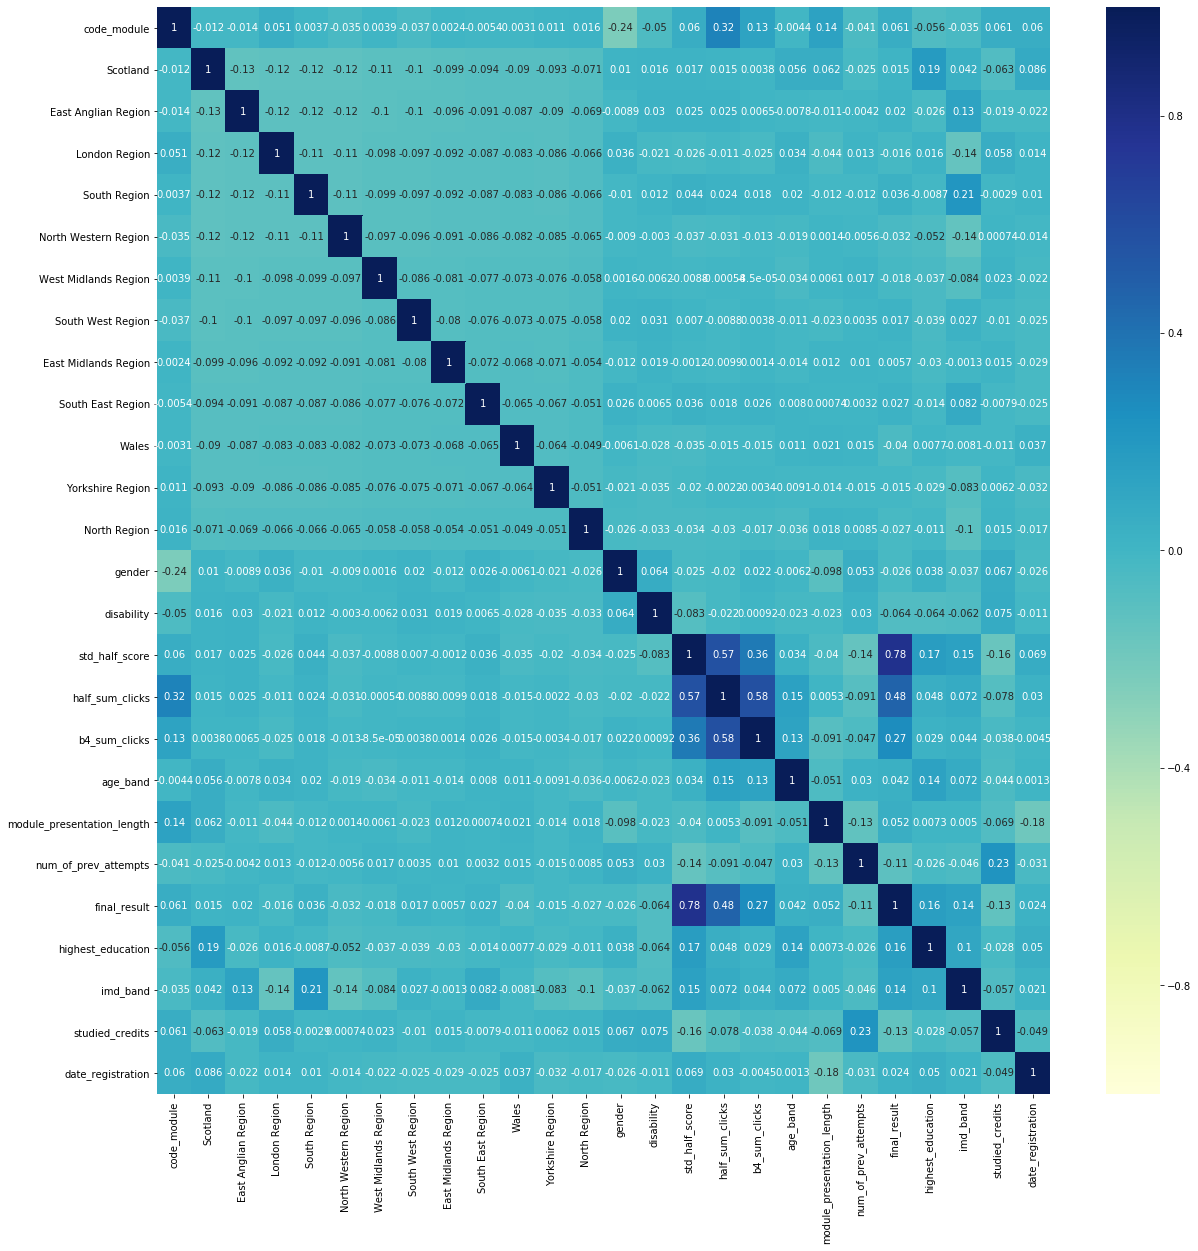

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(tempDf.corr(),vmin=-1,cmap='YlGnBu',annot=True)
plt.show()

## Logistic Regression

In [24]:
tempDf.head(20)

,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,261,0,0,3,9.0,60,-68.0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
9,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,240,0,0,2,4.0,90,-128.0
21,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14.666667,367.0,111.0,1,268,2,0,3,8.0,60,-47.0
26,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.0,0.0,1,268,0,0,1,0.0,30,-61.0
29,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,35.250000,347.0,8.0,0,261,0,0,1,6.0,60,-74.0
37,3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,74.958333,728.0,64.0,0,261,0,0,1,3.0,60,-134.0
38,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,52.166667,305.0,24.0,1,261,0,0,3,1.0,70,-190.0
49,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,94.333333,4595.0,146.0,0,268,0,1,1,4.0,60,-31.0
51,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,75.416667,265.0,61.0,0,261,0,1,2,8.0,60,-96.0


In [25]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.head(20)

,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,261,0,0,3,9.0,60,-68.0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
9,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,240,0,0,2,4.0,90,-128.0
21,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14.666667,367.0,111.0,1,268,2,0,3,8.0,60,-47.0
26,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.0,0.0,1,268,0,0,1,0.0,30,-61.0
29,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,35.250000,347.0,8.0,0,261,0,0,1,6.0,60,-74.0
37,3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,74.958333,728.0,64.0,0,261,0,0,1,3.0,60,-134.0
38,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,52.166667,305.0,24.0,1,261,0,0,3,1.0,70,-190.0
49,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,94.333333,4595.0,146.0,0,268,0,1,1,4.0,60,-31.0
51,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,75.416667,265.0,61.0,0,261,0,1,2,8.0,60,-96.0


In [26]:
tempDf.count()

code_module                   7786
Scotland                      7786
East Anglian Region           7786
London Region                 7786
South Region                  7786
North Western Region          7786
West Midlands Region          7786
South West Region             7786
East Midlands Region          7786
South East Region             7786
Wales                         7786
Yorkshire Region              7786
North Region                  7786
gender                        7786
disability                    7786
std_half_score                7786
half_sum_clicks               7786
b4_sum_clicks                 7786
age_band                      7786
module_presentation_length    7786
num_of_prev_attempts          7786
final_result                  7786
highest_education             7786
imd_band                      7786
studied_credits               7786
date_registration             7786
dtype: int64

In [27]:
# Define our predictors
X=tempDf[['Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','disability','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']

In [28]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.313102
         Iterations 7
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.546    
Dependent Variable:    final_result      AIC:               4917.6241
Date:                  2019-12-06 16:09  BIC:               5063.7858
No. Observations:      7786              Log-Likelihood:    -2437.8  
Df Model:              20                LL-Null:           -5368.8  
Df Residuals:          7765              LLR p-value:       0.0000   
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        7.0000                                        
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Scotland             -3.7340   0.1892 -19.7358 0.0000 -4.1049 -3.3632
East Anglian Reg

In [29]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [30]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


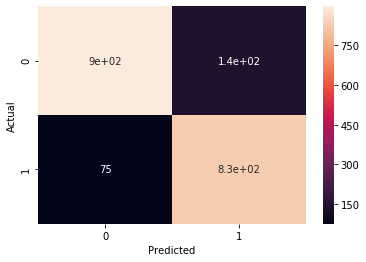

In [31]:
# Get a Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [32]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8880328710837185


In [33]:
# Print the Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8531827515400411


In [34]:
# Print the Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9172185430463576


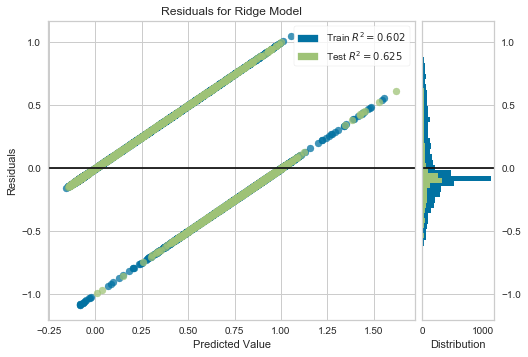

In [35]:
## Residuals Plot
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
model = ResidualsPlot(Ridge())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

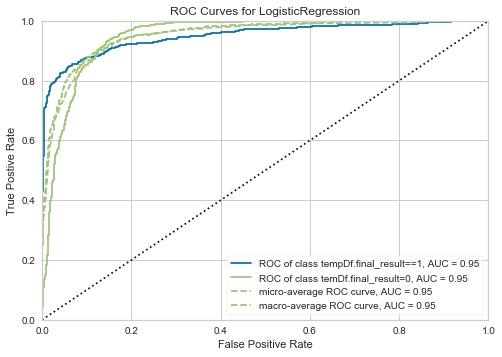

In [36]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["tempDf.final_result==1", "temDf.final_result=0"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Diving Deeper into the Results

In [37]:
print(X_test) # test dataset (without the actual outcome)

       Scotland  East Anglian Region  London Region  South Region  \
7379          0                    1              0             0   
27420         0                    0              0             1   
14386         0                    0              0             0   
27179         1                    0              0             0   
10003         0                    0              0             0   
702           0                    0              1             0   
3137          0                    0              0             0   
8566          0                    0              1             0   
4033          0                    1              0             0   
11854         0                    0              0             0   
10360         0                    0              0             0   
10871         0                    1              0             0   
10958         1                    0              0             0   
5907          0                   

In [38]:
print(y_pred)

[0 1 1 ... 0 0 0]


In [39]:
# Checking the prediction for a New Set of Data
# Let's use our model to predict Year 2014 STEM class results. 
# My goal is to use the existing logistic regression model to predict whether the new student will pass or fail.
# Create a new temporary data frame
tempDf2 = df[['year','term','code_module','module_domain','Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','gender',
              'disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band',
              'module_presentation_length','num_of_prev_attempts','final_result','highest_education',
              'imd_band','studied_credits','date_registration']]
tempDf2 = tempDf2.loc[(tempDf2.year == 1)&(tempDf2.module_domain==1)]
# Show first 20 observations of the dataset
tempDf2.head(20)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
3,1,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,262,1,0,3,3.0,60,-38.0
7,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,74.325000,475.0,181.0,0,269,0,1,2,5.0,120,-110.0
10,1,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,57.333333,1069.0,3.0,0,241,1,1,2,4.0,60,-54.0
13,1,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,84.555556,757.0,51.0,0,241,0,1,3,9.0,60,-47.0
14,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.900000,796.0,201.0,0,269,0,0,3,4.0,60,-114.0
15,1,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,14.000000,105.0,8.0,0,262,2,0,3,1.0,150,-68.0
20,1,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,81.000000,8316.0,308.0,1,241,0,1,3,2.0,90,-25.0
22,1,1,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,0.0,0.0,1,241,0,0,1,0.0,60,-73.0
27,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,94.450000,1001.0,28.0,0,269,0,1,3,7.0,120,-156.0
28,1,1,5,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,33.000000,946.0,0.0,1,241,0,0,1,1.0,120,-65.0


In [40]:
tempDf2.count()

year                          12562
term                          12562
code_module                   12562
module_domain                 12562
Scotland                      12562
East Anglian Region           12562
London Region                 12562
South Region                  12562
North Western Region          12562
West Midlands Region          12562
South West Region             12562
East Midlands Region          12562
South East Region             12562
Wales                         12562
Yorkshire Region              12562
North Region                  12562
gender                        12562
disability                    12562
std_half_score                12562
half_sum_clicks               12562
b4_sum_clicks                 12562
age_band                      12562
module_presentation_length    12562
num_of_prev_attempts          12562
final_result                  12562
highest_education             12562
imd_band                      12562
studied_credits             

In [41]:
# Again, we drop those missing values
tempDf2=tempDf2.dropna()
tempDf2.head(20)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
3,1,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,262,1,0,3,3.0,60,-38.0
7,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,74.325000,475.0,181.0,0,269,0,1,2,5.0,120,-110.0
10,1,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,57.333333,1069.0,3.0,0,241,1,1,2,4.0,60,-54.0
13,1,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,84.555556,757.0,51.0,0,241,0,1,3,9.0,60,-47.0
14,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.900000,796.0,201.0,0,269,0,0,3,4.0,60,-114.0
15,1,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,14.000000,105.0,8.0,0,262,2,0,3,1.0,150,-68.0
20,1,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,81.000000,8316.0,308.0,1,241,0,1,3,2.0,90,-25.0
22,1,1,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,0.0,0.0,1,241,0,0,1,0.0,60,-73.0
27,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,94.450000,1001.0,28.0,0,269,0,1,3,7.0,120,-156.0
28,1,1,5,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,33.000000,946.0,0.0,1,241,0,0,1,1.0,120,-65.0


In [42]:
tempDf2.count()

year                          12562
term                          12562
code_module                   12562
module_domain                 12562
Scotland                      12562
East Anglian Region           12562
London Region                 12562
South Region                  12562
North Western Region          12562
West Midlands Region          12562
South West Region             12562
East Midlands Region          12562
South East Region             12562
Wales                         12562
Yorkshire Region              12562
North Region                  12562
gender                        12562
disability                    12562
std_half_score                12562
half_sum_clicks               12562
b4_sum_clicks                 12562
age_band                      12562
module_presentation_length    12562
num_of_prev_attempts          12562
final_result                  12562
highest_education             12562
imd_band                      12562
studied_credits             

In [43]:
df2 = pd.DataFrame(tempDf2,columns= ['Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
                                     'disability','gender','std_half_score','half_sum_clicks','imd_band','age_band',
                                     'num_of_prev_attempts','highest_education','studied_credits'])

In [44]:
# Show the first 20 observations
df2.head(20)

,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,disability,gender,std_half_score,half_sum_clicks,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,3.0,2,1,3,60
7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,74.325000,475.0,5.0,0,0,2,120
10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,57.333333,1069.0,4.0,0,1,2,60
13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,84.555556,757.0,9.0,0,0,3,60
14,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.900000,796.0,4.0,0,0,3,60
15,0,0,1,0,0,0,0,0,0,0,0,0,0,1,14.000000,105.0,1.0,0,2,3,150
20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,81.000000,8316.0,2.0,1,0,3,90
22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,0.0,0.0,1,0,1,60
27,0,0,0,0,0,0,0,0,0,0,1,0,0,0,94.450000,1001.0,7.0,0,0,3,120
28,0,0,0,1,0,0,0,0,0,0,0,0,0,1,33.000000,946.0,1.0,1,0,1,120


In [45]:
# Define our predictors, this is the model we use in the previous dataset (tempDf)
X=tempDf[['Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
          'disability','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts',
          'highest_education','studied_credits']]
y=tempDf['final_result']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# See how our model works
y_pred_new=logistic_regression.predict(df2)
y_test_new=tempDf2['final_result']

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7205
           1       0.83      0.85      0.84      5357

    accuracy                           0.86     12562
   macro avg       0.86      0.86      0.86     12562
weighted avg       0.86      0.86      0.86     12562



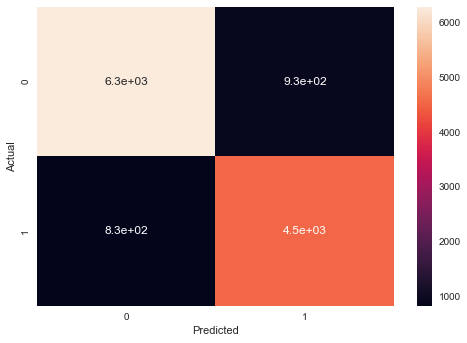

In [48]:
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [49]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.8598949211908932


## Create a temporary data frame for Year 2013 Term J and Term B Social Science Class

In [50]:
SSDf = df[['year','term','code_module','module_domain','Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
           'gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band',
           'module_presentation_length','num_of_prev_attempts','final_result','highest_education',
           'imd_band','studied_credits','date_registration']]

In [51]:
SSDf = SSDf.loc[(SSDf.year == 0)&(SSDf.module_domain==0)]
SSDf.head(20)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,81.600000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,38.813953,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,268,0,0,2,4.0,60,-194.0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,89.612903,365.0,6.0,0,268,0,1,2,5.0,60,-27.0
12,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,63.000000,1465.0,5.0,0,240,0,1,1,2.0,120,-73.0
16,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,268,0,0,1,2.0,120,-31.0
24,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,268,4,0,2,0.0,60,-60.0
31,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000000,0.0,0.0,1,268,0,0,1,4.0,60,-36.0
33,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,59.951613,239.0,0.0,1,268,0,0,1,4.0,120,-43.0
35,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,63.279070,272.0,16.0,0,240,2,0,1,0.0,120,-58.0


In [52]:
SSDf.count()

year                          4332
term                          4332
code_module                   4332
module_domain                 4332
Scotland                      4332
East Anglian Region           4332
London Region                 4332
South Region                  4332
North Western Region          4332
West Midlands Region          4332
South West Region             4332
East Midlands Region          4332
South East Region             4332
Wales                         4332
Yorkshire Region              4332
North Region                  4332
gender                        4332
disability                    4332
std_half_score                4332
half_sum_clicks               4332
b4_sum_clicks                 4332
age_band                      4332
module_presentation_length    4332
num_of_prev_attempts          4332
final_result                  4332
highest_education             4332
imd_band                      4332
studied_credits               4332
date_registration   

In [53]:
SSDf.groupby(['term']).count()

,year,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
term,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587
1,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745,1745


In [54]:
SSDf=SSDf.drop(columns=['year','term','module_domain'])

In [55]:
SSDf.head(5)

,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,81.600000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,38.813953,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,268,0,0,2,4.0,60,-194.0
8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,89.612903,365.0,6.0,0,268,0,1,2,5.0,60,-27.0
12,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,63.000000,1465.0,5.0,0,240,0,1,1,2.0,120,-73.0


In [56]:
# drop missing values
SSDf=SSDf.dropna()
SSDf.count()

code_module                   4332
Scotland                      4332
East Anglian Region           4332
London Region                 4332
South Region                  4332
North Western Region          4332
West Midlands Region          4332
South West Region             4332
East Midlands Region          4332
South East Region             4332
Wales                         4332
Yorkshire Region              4332
North Region                  4332
gender                        4332
disability                    4332
std_half_score                4332
half_sum_clicks               4332
b4_sum_clicks                 4332
age_band                      4332
module_presentation_length    4332
num_of_prev_attempts          4332
final_result                  4332
highest_education             4332
imd_band                      4332
studied_credits               4332
date_registration             4332
dtype: int64

In [57]:
# Define our predictors
X=SSDf[['Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
        'code_module','disability','module_presentation_length','date_registration','gender','std_half_score',
        'half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=SSDf['final_result']

In [58]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.319321
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.539    
Dependent Variable:     final_result        AIC:                 2814.5956
Date:                   2019-12-06 16:21    BIC:                 2967.5664
No. Observations:       4332                Log-Likelihood:      -1383.3  
Df Model:               23                  LL-Null:             -3001.6  
Df Residuals:           4308                LLR p-value:         0.0000   
Converged:              1.0000              Scale:               1.0000   
No. Iterations:         7.0000                                            
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Scotland                   -

In [59]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [60]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


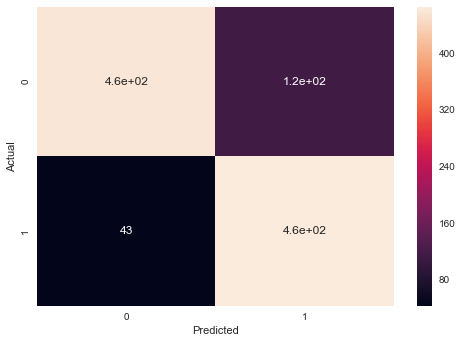

In [61]:
# Get a Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [62]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8541089566020313


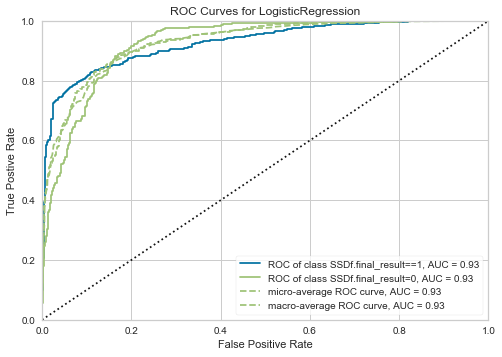

In [63]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["SSDf.final_result==1", "SSDf.final_result=0"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [64]:
# Checking the prediction for a New Set of Data
# Let's use our model to predict Year 2014 Social Science class results. 
# My goal is to use the existing logistic regression model to predict whether the new student will pass or fail.
# Create a new temporary data frame
SSDf2 = df[['year','term','module_domain','Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
            'final_result','code_module','gender','disability','b4_sum_clicks','half_sum_clicks',
            'std_half_score','module_presentation_length','imd_band','age_band','num_of_prev_attempts',
            'highest_education','studied_credits','date_registration']]
SSDf2 = SSDf2.loc[(SSDf2.year == 1)&(SSDf2.module_domain==0)]
# Show first 20 observations of the dataset
SSDf2.head(20)

,year,term,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,final_result,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,module_presentation_length,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits,date_registration
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,256.0,1347.0,56.400000,269,8.0,2,0,3,60,-52.0
11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,30.0,217.0,44.200000,269,6.0,0,0,1,60,-18.0
17,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.000000,234,2.0,0,1,1,120,-156.0
18,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,13.0,32.883721,234,2.0,0,2,2,60,-139.0
19,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,241.0,1408.0,84.600000,269,6.0,1,0,2,60,-38.0
23,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,137.0,993.0,68.000000,262,6.0,1,1,1,60,-92.0
25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,7.0,201.0,61.666667,262,2.0,0,0,2,90,-101.0
36,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.000000,234,0.0,0,4,1,120,-191.0
39,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,349.0,850.0,76.400000,269,4.0,1,0,1,60,-130.0
70,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,90.0,196.0,53.000000,269,4.0,0,0,2,60,-52.0


In [65]:
# Again, we drop those missing values
SSDf2=SSDf2.dropna()
SSDf2.head(20)

,year,term,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,final_result,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,module_presentation_length,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits,date_registration
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,256.0,1347.0,56.400000,269,8.0,2,0,3,60,-52.0
11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,30.0,217.0,44.200000,269,6.0,0,0,1,60,-18.0
17,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.000000,234,2.0,0,1,1,120,-156.0
18,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,13.0,32.883721,234,2.0,0,2,2,60,-139.0
19,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,241.0,1408.0,84.600000,269,6.0,1,0,2,60,-38.0
23,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,137.0,993.0,68.000000,262,6.0,1,1,1,60,-92.0
25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,7.0,201.0,61.666667,262,2.0,0,0,2,90,-101.0
36,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.000000,234,0.0,0,4,1,120,-191.0
39,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,349.0,850.0,76.400000,269,4.0,1,0,1,60,-130.0
70,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,90.0,196.0,53.000000,269,4.0,0,0,2,60,-52.0


In [66]:
SSDf2.count()

year                          4230
term                          4230
module_domain                 4230
Scotland                      4230
East Anglian Region           4230
London Region                 4230
South Region                  4230
North Western Region          4230
West Midlands Region          4230
South West Region             4230
East Midlands Region          4230
South East Region             4230
Wales                         4230
Yorkshire Region              4230
North Region                  4230
final_result                  4230
code_module                   4230
gender                        4230
disability                    4230
b4_sum_clicks                 4230
half_sum_clicks               4230
std_half_score                4230
module_presentation_length    4230
imd_band                      4230
age_band                      4230
num_of_prev_attempts          4230
highest_education             4230
studied_credits               4230
date_registration   

In [67]:
SST2 = pd.DataFrame(SSDf2,columns= ['Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
                                    'code_module','disability','module_presentation_length','date_registration',
                                    'gender','std_half_score','half_sum_clicks','imd_band','age_band',
                                    'num_of_prev_attempts','highest_education','studied_credits'])

In [68]:
# Define our predictors, this is the model we use in the previous dataset (tempDf)
X=SSDf[['Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
        'code_module','disability','module_presentation_length','date_registration','gender','std_half_score',
        'half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=SSDf['final_result']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# See how our model works
y_pred_new=logistic_regression.predict(SST2)
y_test_new=SSDf2['final_result']

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2122
           1       0.82      0.94      0.87      2108

    accuracy                           0.86      4230
   macro avg       0.87      0.86      0.86      4230
weighted avg       0.87      0.86      0.86      4230



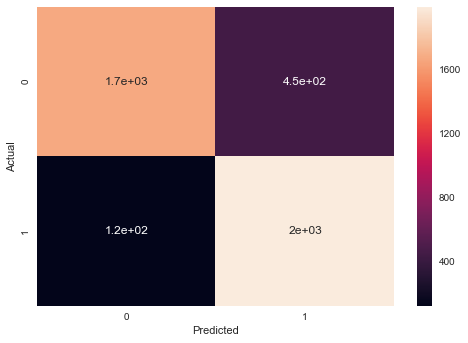

In [71]:
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [72]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.8645390070921986


## What if we combine STEM and Social Science courses together?

In [8]:
ComtempDf = df[['year','term','code_module','module_domain','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]
ComtempDf = ComtempDf.loc[(ComtempDf.year == 0)]
# Show first 20 observations of the dataset, this is the combine dataset for 2013 STEM and Social Science Class
ComtempDf.head(5)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,261,0,0,3,9.0,60,-68.0
2,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,81.600000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,38.813953,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,268,0,0,2,4.0,60,-194.0


In [9]:
ComtempDf.count()

year                          12118
term                          12118
code_module                   12118
module_domain                 12118
Scotland                      12118
East Anglian Region           12118
London Region                 12118
South Region                  12118
North Western Region          12118
West Midlands Region          12118
South West Region             12118
East Midlands Region          12118
South East Region             12118
Wales                         12118
Yorkshire Region              12118
North Region                  12118
gender                        12118
disability                    12118
std_half_score                12118
half_sum_clicks               12118
b4_sum_clicks                 12118
age_band                      12118
module_presentation_length    12118
num_of_prev_attempts          12118
final_result                  12118
highest_education             12118
imd_band                      12118
studied_credits             

In [11]:
# Define our predictors
X=ComtempDf[['module_domain','Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
        'code_module','disability','module_presentation_length','date_registration','gender','std_half_score',
        'half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=ComtempDf['final_result']

In [12]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306863
         Iterations 7
                              Results: Logit
Model:                   Logit               Pseudo R-squared:    0.556    
Dependent Variable:      final_result        AIC:                 7487.1420
Date:                    2019-12-07 01:55    BIC:                 7672.2032
No. Observations:        12118               Log-Likelihood:      -3718.6  
Df Model:                24                  LL-Null:             -8375.8  
Df Residuals:            12093               LLR p-value:         0.0000   
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          7.0000                                            
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
module_domain    

In [13]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [14]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


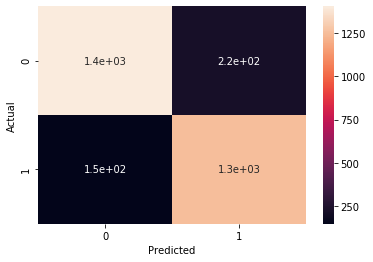

In [16]:
# Get a Confusion Matrix
from sklearn import metrics
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [17]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8792079207920792


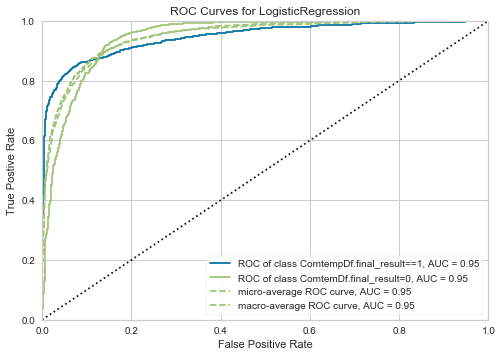

In [18]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["ComtempDf.final_result==1", "ComtemDf.final_result=0"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [22]:
# Predict 2014 Results
ComtempDf2 = df[['year','term','code_module','module_domain','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]
ComtempDf2 = ComtempDf2.loc[(ComtempDf2.year == 1)]

In [24]:
# Define our predictors
X=ComtempDf[['module_domain','Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
        'code_module','disability','module_presentation_length','date_registration','gender','std_half_score',
        'half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=ComtempDf['final_result']

In [25]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [26]:
comtest=pd.DataFrame(ComtempDf2,columns= ['module_domain','Scotland','East Anglian Region',
              'London Region','South Region','North Western Region','West Midlands Region','South West Region',
              'East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
                                    'code_module','disability','module_presentation_length','date_registration',
                                    'gender','std_half_score','half_sum_clicks','imd_band','age_band',
                                    'num_of_prev_attempts','highest_education','studied_credits'])

In [29]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_new_com=logistic_regression.predict(comtest)
y_test_new_com=ComtempDf2['final_result']

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new_com, y_pred_new_com))

Accuracy:  0.8588018103858981
